# Preprocessing and Modeling

Ear Images Reference:https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0232776

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2, VGG16, InceptionV3, Xception, InceptionResNetV2, ResNet101
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

### DateFrame to Input Results From Models

In [229]:
results_df = pd.DataFrame(columns = ['train_accuracy', 'val_accuracy', 'test_accuracy', 'train_precision', 'val_precision', 'test_precision', 'train_recall', 'val_recall', 'test_recall'], index = ['baseline', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_9', 'model_10', 'model_11', 'model_12', 'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18', 'model_19', 'model_20'])

## Import Data 

In [81]:
train_gen = ImageDataGenerator(rescale = 1/255., validation_split=0.2)

train_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training' )

validation_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', batch_size = 32, subset = 'validation' )

Found 252 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


In [82]:
test_gen = ImageDataGenerator(rescale = 1/255.)

test_data = test_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/', shuffle = False)

Found 159 images belonging to 3 classes.


## Basic Model

In [6]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [7]:
history = model.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 5s 528ms/step - loss: 40.8025 - accuracy: 0.4365 - recall: 0.4087 - precision: 0.4421 - val_loss: 7.7112 - val_accuracy: 0.4426 - val_recall: 0.4426 - val_precision: 0.4426
Epoch 2/80
8/8 [==============================] - 4s 475ms/step - loss: 15.6716 - accuracy: 0.3889 - recall: 0.3889 - precision: 0.3889 - val_loss: 7.6615 - val_accuracy: 0.5246 - val_recall: 0.5246 - val_precision: 0.5246
Epoch 3/80
8/8 [==============================] - 4s 489ms/step - loss: 6.8686 - accuracy: 0.4762 - recall: 0.4762 - precision: 0.4762 - val_loss: 4.1677 - val_accuracy: 0.4754 - val_recall: 0.4754 - val_precision: 0.4754
Epoch 4/80
8/8 [==============================] - 4s 519ms/step - loss: 2.7801 - accuracy: 0.5675 - recall: 0.5635 - precision: 0.5680 - val_loss: 1.7790 - val_accuracy: 0.6557 - val_recall: 0.6393 - val_precision: 0.6500
Epoch 5/80
8/8 [==============================] - 4s 488ms/step - loss: 1.3439 - accuracy: 0.6984 - recall: 0.

#### Adding Results to DF

In [230]:
results_df['train_accuracy'].iloc[0] = 1

In [232]:
results_df['val_accuracy'].iloc[0] = 0.7541

In [233]:
results_df['train_precision'].iloc[0] = 1

In [234]:
results_df['val_precision'].iloc[0] = 0.7627

In [235]:
results_df['train_recall'].iloc[0] = 1

In [236]:
results_df['val_recall'].iloc[0] = 0.7377

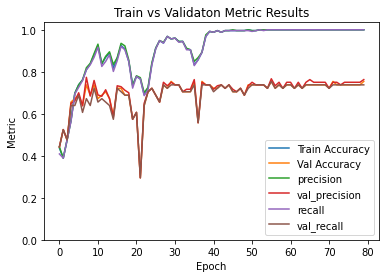

In [292]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history.history['precision'], label = 'precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validaton Metric Results');

Very over fit. However, validation accuracy, precision and recall hovering in the 0.70

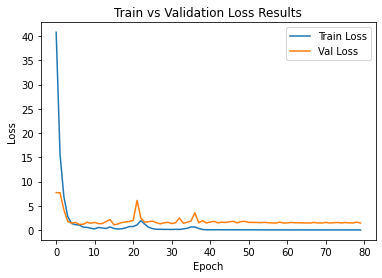

In [253]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [10]:
model.evaluate(test_data)

preds = model.predict(test_data) > 0.5

preds = preds.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds.argmax(axis=1))


5/5 [==============================] - 2s 327ms/step - loss: 3.6401 - accuracy: 0.4528 - recall: 0.4528 - precision: 0.4528


#### Adding Results to DF

In [238]:
results_df['test_recall'].iloc[0] = 0.4528

In [239]:
results_df['test_accuracy'].iloc[0] = 0.4528

In [240]:
results_df['test_precision'].iloc[0] =  0.4528

#### Confusion Matrix

In [11]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        13    43      12
tube            12    37      11
normal           3     6      22


#### Classification Report 

In [12]:
print(classification_report(test_data_values, preds.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

              precision    recall  f1-score   support

    effusion       0.46      0.19      0.27        68
        tube       0.43      0.62      0.51        60
      normal       0.49      0.71      0.58        31

    accuracy                           0.45       159
   macro avg       0.46      0.51      0.45       159
weighted avg       0.46      0.45      0.42       159



## Model 1: Adding Epochs

In [13]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(3, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [14]:
history1 = model1.fit(train_data, epochs = 100, validation_data = validation_data,
    batch_size = 32)

Epoch 1/100
8/8 [==============================] - 5s 537ms/step - loss: 37.3069 - accuracy: 0.3889 - recall: 0.3651 - precision: 0.3866 - val_loss: 12.5787 - val_accuracy: 0.4262 - val_recall: 0.4262 - val_precision: 0.4262
Epoch 2/100
8/8 [==============================] - 4s 456ms/step - loss: 13.2842 - accuracy: 0.4683 - recall: 0.4683 - precision: 0.4683 - val_loss: 8.1849 - val_accuracy: 0.5246 - val_recall: 0.5246 - val_precision: 0.5246
Epoch 3/100
8/8 [==============================] - 4s 464ms/step - loss: 5.8800 - accuracy: 0.6111 - recall: 0.6111 - precision: 0.6111 - val_loss: 5.4982 - val_accuracy: 0.5246 - val_recall: 0.5082 - val_precision: 0.5167
Epoch 4/100
8/8 [==============================] - 4s 453ms/step - loss: 4.0764 - accuracy: 0.6190 - recall: 0.6190 - precision: 0.6190 - val_loss: 3.1972 - val_accuracy: 0.7049 - val_recall: 0.6721 - val_precision: 0.6949
Epoch 5/100
8/8 [==============================] - 4s 460ms/step - loss: 1.8107 - accuracy: 0.7738 - reca

#### Adding Results to DF

In [244]:
results_df['train_accuracy'].iloc[1] = 1

In [245]:
results_df['val_accuracy'].iloc[1] = 0.7541

In [246]:
results_df['train_recall'].iloc[1] = 1

In [247]:
results_df['val_recall'].iloc[1] = 0.7541 

In [248]:
results_df['train_precision'].iloc[1] = 1

In [249]:
results_df['val_precision'].iloc[1] = 0.7541

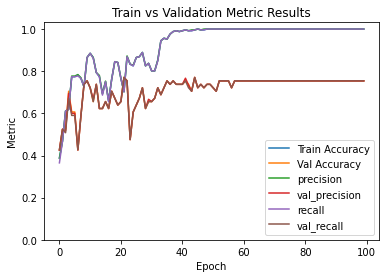

In [291]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history1.history['precision'], label = 'precision')
plt.plot(history1.history['val_precision'], label = 'val_precision')
plt.plot(history1.history['recall'], label = 'recall')
plt.plot(history1.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model still overfit. Validation accuracy, precision, and recall still hovering in the 0.70

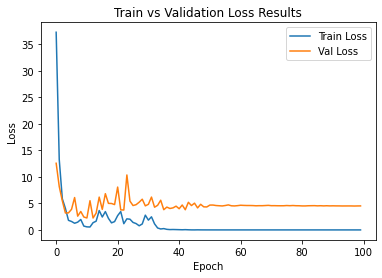

In [252]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [19]:
model1.evaluate(test_data)

preds1 = model1.predict(test_data) > 0.5

preds1 = preds1.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds1.argmax(axis=1))
cm

5/5 [==============================] - 2s 352ms/step - loss: 11.6797 - accuracy: 0.4403 - recall: 0.4403 - precision: 0.4403


array([[12, 41, 15],
       [13, 33, 14],
       [ 3,  3, 25]])

#### Adding Test Data to DF

In [254]:
results_df['test_accuracy'].iloc[1] = 0.4403 

In [255]:
results_df['test_recall'].iloc[1] = 0.4403 

In [256]:
results_df['test_precision'].iloc[1] = 0.4403 

#### Confusion Matrix

In [21]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        12    41      15
tube            13    33      14
normal           3     3      25


#### Classifcation Report 

In [22]:
print(classification_report(test_data_values, preds1.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.43      0.18      0.25        68
        tube       0.43      0.55      0.48        60
      normal       0.46      0.81      0.59        31

    accuracy                           0.44       159
   macro avg       0.44      0.51      0.44       159
weighted avg       0.44      0.44      0.40       159



## Model 2: Adding Layers 

In [23]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(3, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [24]:
history2 = model2.fit(train_data, epochs = 100, validation_data = validation_data,
    batch_size = 32)

Epoch 1/100
8/8 [==============================] - 5s 534ms/step - loss: 13.1238 - accuracy: 0.3214 - recall: 0.2857 - precision: 0.3243 - val_loss: 9.1417 - val_accuracy: 0.4262 - val_recall: 0.4262 - val_precision: 0.4262
Epoch 2/100
8/8 [==============================] - 4s 460ms/step - loss: 10.8844 - accuracy: 0.4603 - recall: 0.4603 - precision: 0.4603 - val_loss: 11.4728 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 3/100
8/8 [==============================] - 4s 446ms/step - loss: 8.8007 - accuracy: 0.3730 - recall: 0.3730 - precision: 0.3730 - val_loss: 4.4824 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 4/100
8/8 [==============================] - 3s 435ms/step - loss: 7.3145 - accuracy: 0.3968 - recall: 0.3968 - precision: 0.3968 - val_loss: 5.1190 - val_accuracy: 0.3443 - val_recall: 0.3279 - val_precision: 0.3333
Epoch 5/100
8/8 [==============================] - 3s 427ms/step - loss: 2.5877 - accuracy: 0.5278 - reca

#### Adding Results to DF

In [257]:
results_df['train_accuracy'].iloc[2] = 1

In [258]:
results_df['train_recall'].iloc[2] = 1

In [259]:
results_df['train_precision'].iloc[2] = 1

In [260]:
results_df['val_accuracy'].iloc[2] = 0.7049

In [261]:
results_df['val_recall'].iloc[2] = 0.7049

In [262]:
results_df['val_precision'].iloc[2] = 0.7049

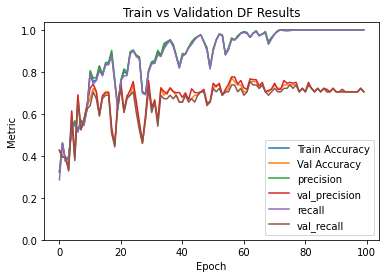

In [290]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history2.history['precision'], label = 'precision')
plt.plot(history2.history['val_precision'], label = 'val_precision')
plt.plot(history2.history['recall'], label = 'recall')
plt.plot(history2.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation DF Results');

Model still overfit. Validation accuracy, precision, and recall still hovering in the 70s

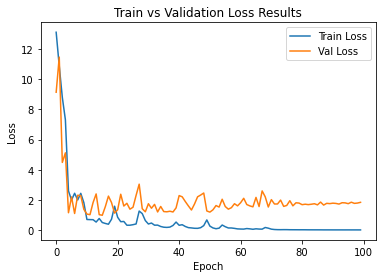

In [264]:
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [27]:
model2.evaluate(test_data)

preds2 = model2.predict(test_data) > 0.5

preds2 = preds2.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds2.argmax(axis=1))

5/5 [==============================] - 2s 335ms/step - loss: 4.4004 - accuracy: 0.4591 - recall: 0.4591 - precision: 0.4679


#### Adding Results to DF

In [265]:
results_df['test_accuracy'].iloc[2] =  0.4591

In [266]:
results_df['test_precision'].iloc[2] =  0.4679

In [267]:
results_df['test_recall'].iloc[2] =  0.4591

#### Confusion Matrix

In [28]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        13    41      14
tube            10    36      14
normal           3     4      24


#### Classification Report 

In [29]:
print(classification_report(test_data_values, preds2.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.50      0.19      0.28        68
        tube       0.44      0.60      0.51        60
      normal       0.46      0.77      0.58        31

    accuracy                           0.46       159
   macro avg       0.47      0.52      0.46       159
weighted avg       0.47      0.46      0.42       159



## Model 3: Changing Layers and Using Early Stopping 

In [30]:
early_stop = EarlyStopping(patience = 5)

In [31]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(3, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [32]:
history3 = model3.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32, callbacks=[early_stop])

Epoch 1/80
8/8 [==============================] - 5s 551ms/step - loss: 28.5880 - accuracy: 0.3095 - recall: 0.2778 - precision: 0.2991 - val_loss: 13.9876 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 2/80
8/8 [==============================] - 3s 437ms/step - loss: 7.7029 - accuracy: 0.4643 - recall: 0.4603 - precision: 0.4622 - val_loss: 4.2067 - val_accuracy: 0.4262 - val_recall: 0.4262 - val_precision: 0.4262
Epoch 3/80
8/8 [==============================] - 3s 433ms/step - loss: 1.9946 - accuracy: 0.5992 - recall: 0.5952 - precision: 0.6073 - val_loss: 2.8687 - val_accuracy: 0.6885 - val_recall: 0.6885 - val_precision: 0.7119
Epoch 4/80
8/8 [==============================] - 4s 457ms/step - loss: 2.6940 - accuracy: 0.6389 - recall: 0.6349 - precision: 0.6452 - val_loss: 2.8964 - val_accuracy: 0.4754 - val_recall: 0.4754 - val_precision: 0.4754
Epoch 5/80
8/8 [==============================] - 3s 441ms/step - loss: 1.8797 - accuracy: 0.6627 - recall: 0.

#### Adding Results to DF

In [270]:
results_df['train_accuracy'].iloc[3] = 0.7976

In [271]:
results_df['train_recall'].iloc[3] = 0.7976

In [272]:
results_df['train_precision'].iloc[3] = 0.7976

In [273]:
results_df['val_accuracy'].iloc[3] = 0.7213

In [274]:
results_df['val_recall'].iloc[3] = 0.7213

In [275]:
results_df['val_precision'].iloc[3] = 0.7333

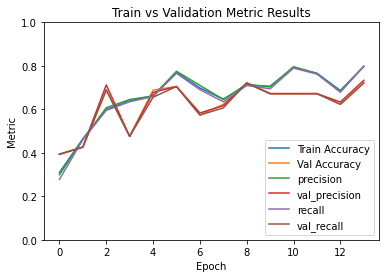

In [289]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history3.history['precision'], label = 'precision')
plt.plot(history3.history['val_precision'], label = 'val_precision')
plt.plot(history3.history['recall'], label = 'recall')
plt.plot(history3.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


Model not looking as overfit as previous models. Validation accuracy, precision and recall are still hovering in the 0.7s

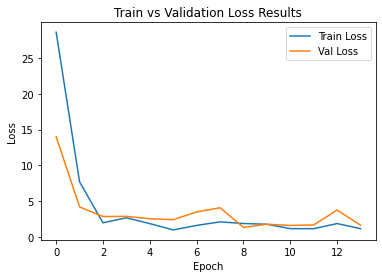

In [277]:
plt.plot(history3.history['loss'], label = 'Train Loss')
plt.plot(history3.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [35]:
model3.evaluate(test_data)

preds3 = model3.predict(test_data) > 0.5

preds3 = preds3.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds3.argmax(axis=1))

5/5 [==============================] - 2s 345ms/step - loss: 5.3705 - accuracy: 0.4151 - recall: 0.4151 - precision: 0.4231


#### Adding Results to DF

In [278]:
results_df['test_precision'].iloc[3] =  0.4231

In [279]:
results_df['test_recall'].iloc[3] = 0.4151

In [280]:
results_df['test_accuracy'].iloc[3] = 0.4151

#### Confusion Matrix

In [36]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        22    43       3
tube            24    35       1
normal           4    16      11


#### Classification Report 

In [37]:
print(classification_report(test_data_values, preds3.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#precision:TP/(TP+FP)
#recall:TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.44      0.32      0.37        68
        tube       0.37      0.58      0.45        60
      normal       0.73      0.35      0.48        31

    accuracy                           0.43       159
   macro avg       0.52      0.42      0.44       159
weighted avg       0.47      0.43      0.42       159



## Model 4: Changing Layers and Dropout

In [59]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(50, activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(3, activation = 'softmax'))

model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [60]:
history4 = model4.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 4s 507ms/step - loss: 43.1814 - accuracy: 0.3651 - recall: 0.3611 - precision: 0.3872 - val_loss: 12.3297 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 2/80
8/8 [==============================] - 3s 420ms/step - loss: 19.6420 - accuracy: 0.3532 - recall: 0.3532 - precision: 0.3532 - val_loss: 2.2048 - val_accuracy: 0.6066 - val_recall: 0.5902 - val_precision: 0.6102
Epoch 3/80
8/8 [==============================] - 3s 428ms/step - loss: 11.3946 - accuracy: 0.5317 - recall: 0.5317 - precision: 0.5317 - val_loss: 4.6306 - val_accuracy: 0.5246 - val_recall: 0.5246 - val_precision: 0.5246
Epoch 4/80
8/8 [==============================] - 3s 444ms/step - loss: 7.6049 - accuracy: 0.5476 - recall: 0.5476 - precision: 0.5476 - val_loss: 4.0888 - val_accuracy: 0.5574 - val_recall: 0.5574 - val_precision: 0.5574
Epoch 5/80
8/8 [==============================] - 3s 449ms/step - loss: 6.7937 - accuracy: 0.5754 - recall: 

#### Adding Results to DF

In [281]:
results_df['train_accuracy'].iloc[4] = 0.9960 

In [282]:
results_df['train_recall'].iloc[4] = 0.9960 

In [283]:
results_df['train_precision'].iloc[4] = 1.0000 

In [284]:
results_df['val_accuracy'].iloc[4] = 0.7377

In [285]:
results_df['val_recall'].iloc[4] = 0.7377

In [286]:
results_df['val_precision'].iloc[4] = 0.7500

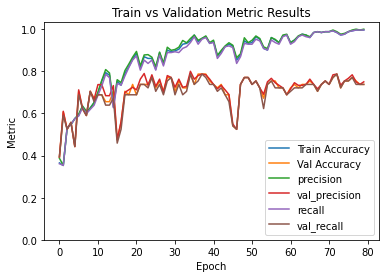

In [287]:
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history4.history['precision'], label = 'precision')
plt.plot(history4.history['val_precision'], label = 'val_precision')
plt.plot(history4.history['recall'], label = 'recall')
plt.plot(history4.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');



Model is still overfit. Validation recall, precision and accuracy are hovering in the 0.7s.

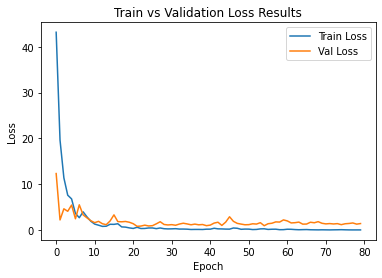

In [288]:
plt.plot(history4.history['loss'], label = 'Train Loss')
plt.plot(history4.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [64]:
model4.evaluate(test_data)

preds4 = model4.predict(test_data) > 0.5

preds4 = preds4.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds4.argmax(axis=1))

5/5 [==============================] - 2s 354ms/step - loss: 4.5136 - accuracy: 0.5094 - recall: 0.5094 - precision: 0.5094


#### Adding Results to DF

In [294]:
results_df['test_accuracy'].iloc[4] = 0.5094

In [295]:
results_df['test_recall'].iloc[4] = 0.5094 

In [296]:
results_df['test_precision'].iloc[4] = 0.5094

#### Confusion Matrix 

In [65]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        15    42      11
tube            11    41       8
normal           2     4      25


#### Classification Report 

In [66]:
print(classification_report(test_data_values, preds4.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.54      0.22      0.31        68
        tube       0.47      0.68      0.56        60
      normal       0.57      0.81      0.67        31

    accuracy                           0.51       159
   macro avg       0.53      0.57      0.51       159
weighted avg       0.52      0.51      0.47       159



## Model 5: Kernal Regularizer with Dropout

In [67]:
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(100, activation = 'relu'))
model5.add(Dropout(0.1))
model5.add(Dense(50, activation = 'relu', kernel_regularizer = l2(0.1)))
model5.add(Dense(3, activation = 'softmax'))

model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [68]:
history5 = model5.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 5s 550ms/step - loss: 42.5295 - accuracy: 0.3810 - recall: 0.3690 - precision: 0.4026 - val_loss: 27.1916 - val_accuracy: 0.1803 - val_recall: 0.1803 - val_precision: 0.1803
Epoch 2/80
8/8 [==============================] - 4s 445ms/step - loss: 31.1794 - accuracy: 0.3690 - recall: 0.3690 - precision: 0.3690 - val_loss: 17.4148 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 3/80
8/8 [==============================] - 4s 447ms/step - loss: 16.9347 - accuracy: 0.3810 - recall: 0.3810 - precision: 0.3810 - val_loss: 3.6119 - val_accuracy: 0.3934 - val_recall: 0.3770 - val_precision: 0.3898
Epoch 4/80
8/8 [==============================] - 4s 465ms/step - loss: 9.6129 - accuracy: 0.4960 - recall: 0.4960 - precision: 0.5000 - val_loss: 1.0873 - val_accuracy: 0.6230 - val_recall: 0.6066 - val_precision: 0.6379
Epoch 5/80
8/8 [==============================] - 4s 533ms/step - loss: 7.0707 - accuracy: 0.4762 - recall:

#### Adding Results to DF

In [297]:
results_df['train_accuracy'].iloc[5] = 0.8333

In [298]:
results_df['train_recall'].iloc[5] = 0.8294

In [299]:
results_df['train_precision'].iloc[5] = 0.8462

In [300]:
results_df['val_accuracy'].iloc[5] = 0.6885

In [301]:
results_df['val_recall'].iloc[5] = 0.6721

In [302]:
results_df['val_precision'].iloc[5] = 0.7069

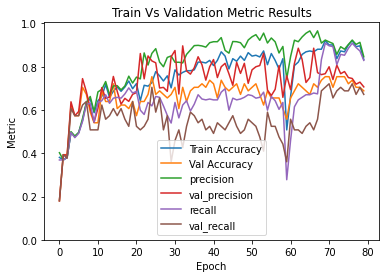

In [303]:
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history5.history['precision'], label = 'precision')
plt.plot(history5.history['val_precision'], label = 'val_precision')
plt.plot(history5.history['recall'], label = 'recall')
plt.plot(history5.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train Vs Validation Metric Results');

Model looking less overfit. However, validation accuracy, precision and recall are hovering around 0.6s and 0.7

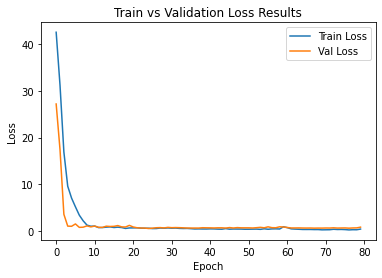

In [304]:
plt.plot(history5.history['loss'], label = 'Train Loss')
plt.plot(history5.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [71]:
model5.evaluate(test_data)

preds5 = model5.predict(test_data) > 0.5

preds5 = preds5.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds5.argmax(axis=1))

5/5 [==============================] - 2s 329ms/step - loss: 1.9862 - accuracy: 0.4528 - recall: 0.4340 - precision: 0.4631


#### Adding Results to DF

In [305]:
results_df['test_accuracy'].iloc[5] = 0.4528

In [306]:
results_df['test_recall'].iloc[5] =0.4340

In [307]:
results_df['test_precision'].iloc[5]  = 0.4631

#### Confusion Matrix

In [72]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        17    48       3
tube             2    47      11
normal           2    17      12


#### Classification Report 

In [73]:
print(classification_report(test_data_values, preds5.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.81      0.25      0.38        68
        tube       0.42      0.78      0.55        60
      normal       0.46      0.39      0.42        31

    accuracy                           0.48       159
   macro avg       0.56      0.47      0.45       159
weighted avg       0.59      0.48      0.45       159



## Model 6: Adding Convolutional Operation

In [83]:
model6 = Sequential()
model6.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(100, activation = 'relu'))
model6.add(Dropout(0.1))
model6.add(Dense(50, activation = 'relu'))
model6.add(Dense(3, activation = 'softmax'))

model6.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])


In [84]:
history6 = model6.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 6s 709ms/step - loss: 40.3470 - accuracy: 0.3968 - recall: 0.3571 - precision: 0.4018 - val_loss: 14.2930 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 2/80
8/8 [==============================] - 6s 681ms/step - loss: 18.3001 - accuracy: 0.3175 - recall: 0.3175 - precision: 0.3175 - val_loss: 0.6299 - val_accuracy: 0.7705 - val_recall: 0.7705 - val_precision: 0.7833
Epoch 3/80
8/8 [==============================] - 6s 758ms/step - loss: 6.6012 - accuracy: 0.4127 - recall: 0.4048 - precision: 0.4096 - val_loss: 0.6170 - val_accuracy: 0.8033 - val_recall: 0.7869 - val_precision: 0.8136
Epoch 4/80
8/8 [==============================] - 5s 660ms/step - loss: 2.2113 - accuracy: 0.6429 - recall: 0.6349 - precision: 0.6478 - val_loss: 0.8068 - val_accuracy: 0.7049 - val_recall: 0.6557 - val_precision: 0.7273
Epoch 5/80
8/8 [==============================] - 5s 644ms/step - loss: 0.9285 - accuracy: 0.6587 - recall: 0

#### Adding Results to DF

In [308]:
results_df['train_accuracy'].iloc[6] = 0.9960

results_df['train_precision'].iloc[6] = 0.9960

results_df['train_recall'].iloc[6] = 0.9960

results_df['val_accuracy'].iloc[6] = 0.8033

results_df['val_precision'].iloc[6] =0.8033

results_df['val_recall'].iloc[6] = 0.8033

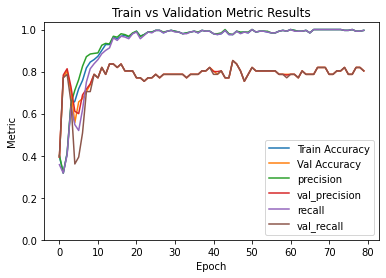

In [311]:
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history6.history['precision'], label = 'precision')
plt.plot(history6.history['val_precision'], label = 'val_precision')
plt.plot(history6.history['recall'], label = 'recall')
plt.plot(history6.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model still overfit but validation accuracy, precision and recall are increasing with values in the 0.8

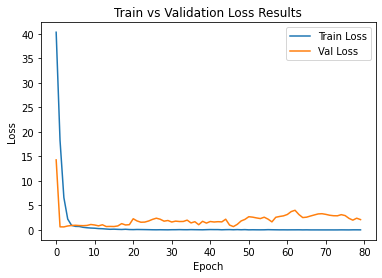

In [312]:
plt.plot(history6.history['loss'], label = 'Train Loss')
plt.plot(history6.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [87]:
model6.evaluate(test_data)

preds6 = model6.predict(test_data) > 0.5

preds6 = preds6.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds6.argmax(axis=1))

5/5 [==============================] - 2s 331ms/step - loss: 2.6610 - accuracy: 0.5409 - recall: 0.5409 - precision: 0.5478


#### Adding Results to DF

In [313]:
results_df['test_accuracy'].iloc[6] = 0.5409

results_df['test_precision'].iloc[6] = 0.5478

results_df['test_recall'].iloc[6] = 0.5409

#### Confusion Matrix

In [361]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        22    31      15
tube            14    40       6
normal           2     4      25


#### Classification Report 

In [362]:
print(classification_report(test_data_values, preds6.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.58      0.32      0.42        68
        tube       0.53      0.67      0.59        60
      normal       0.54      0.81      0.65        31

    accuracy                           0.55       159
   macro avg       0.55      0.60      0.55       159
weighted avg       0.55      0.55      0.53       159



## Model 7: Convolutional Operation and Max Pooling

In [331]:
model7 = Sequential()
model7.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model7.add(MaxPool2D((2, 2)))
model7.add(Flatten())
model7.add(Dense(100, activation = 'relu'))
model7.add(Dropout(0.1))
model7.add(Dense(3, activation = 'softmax'))

model7.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [332]:
history7 = model7.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 5s 580ms/step - loss: 9.9341 - accuracy: 0.3770 - recall: 0.3690 - precision: 0.4170 - val_loss: 2.3514 - val_accuracy: 0.2131 - val_recall: 0.2131 - val_precision: 0.2131
Epoch 2/80
8/8 [==============================] - 4s 502ms/step - loss: 1.4549 - accuracy: 0.4206 - recall: 0.3571 - precision: 0.4369 - val_loss: 0.8561 - val_accuracy: 0.6721 - val_recall: 0.4754 - val_precision: 0.6591
Epoch 3/80
8/8 [==============================] - 4s 503ms/step - loss: 0.8035 - accuracy: 0.7063 - recall: 0.5873 - precision: 0.7551 - val_loss: 0.7958 - val_accuracy: 0.8033 - val_recall: 0.4754 - val_precision: 0.8788
Epoch 4/80
8/8 [==============================] - 4s 535ms/step - loss: 0.6687 - accuracy: 0.7976 - recall: 0.6508 - precision: 0.8632 - val_loss: 0.6386 - val_accuracy: 0.7869 - val_recall: 0.6066 - val_precision: 0.8222
Epoch 5/80
8/8 [==============================] - 5s 557ms/step - loss: 0.5748 - accuracy: 0.8095 - recall: 0.69

#### Adding Results to DF

In [334]:
results_df['train_accuracy'].iloc[7] = 1

results_df['train_precision'].iloc[7] = 1

results_df['train_recall'].iloc[7] = 1

results_df['val_accuracy'].iloc[7] = 0.8197

results_df['val_precision'].iloc[7] =0.8197

results_df['val_recall'].iloc[7] = 0.8197

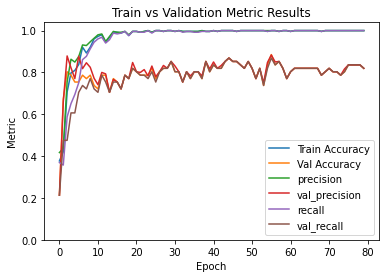

In [333]:
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history7.history['precision'], label = 'precision')
plt.plot(history7.history['val_precision'], label = 'val_precision')
plt.plot(history7.history['recall'], label = 'recall')
plt.plot(history7.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model still overfit but validation accuracy, precision and recall are increasing with values in the 0.8

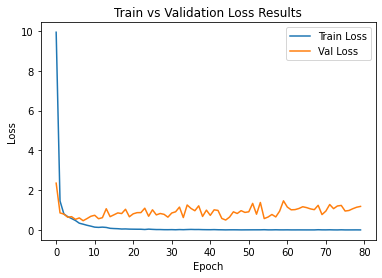

In [335]:
plt.plot(history7.history['loss'], label = 'Train Loss')
plt.plot(history7.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [100]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [336]:
model7.evaluate(test_data)

preds7 = model7.predict(test_data) > 0.5

preds7 = preds7.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds7.argmax(axis=1))

5/5 [==============================] - 2s 332ms/step - loss: 3.1027 - accuracy: 0.5660 - recall: 0.5597 - precision: 0.5633


#### Adding Results to DF

In [337]:
results_df['test_accuracy'].iloc[7] = 0.5660

results_df['test_precision'].iloc[7] = 0.5633

results_df['test_recall'].iloc[7] = 0.5597

#### Confusion Matrix

In [363]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        23    32      13
tube            17    41       2
normal           1     5      25


#### Classification Report 

In [364]:
print(classification_report(test_data_values, preds7.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.56      0.34      0.42        68
        tube       0.53      0.68      0.59        60
      normal       0.62      0.81      0.70        31

    accuracy                           0.56       159
   macro avg       0.57      0.61      0.57       159
weighted avg       0.56      0.56      0.54       159



## Model 8: Adding Prebuilt Networks InceptionV3

In [97]:
train_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                  validation_split=0.2)

In [115]:
test_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                  validation_split=0.2)

In [98]:
train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training' )

valid_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'validation' )

Found 252 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


In [116]:
test_data_aug = test_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/', shuffle = False)

Found 159 images belonging to 3 classes.


In [152]:
conv_base = InceptionV3(include_top=False, input_shape = (150, 150, 3))

In [153]:
preds = conv_base.predict(train_aug)

In [154]:
preds_val = conv_base.predict(valid_aug)

In [155]:
model8 = Sequential()
model8.add(Flatten())
model8.add(Dense(100, activation = 'relu'))
model8.add(Dropout(0.1))
#model8.add(Dense(50, activation = 'relu'))
model8.add(Dense(3, activation = 'softmax'))

model8.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [156]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [157]:
history8 = model8.fit(preds, y_train_binarized, epochs = 30, validation_data = (preds_val, y_valid_binarized),
    batch_size = 32)

Epoch 1/30
8/8 [==============================] - 1s 77ms/step - loss: 14.3990 - accuracy: 0.2817 - recall: 0.2738 - precision: 0.2840 - val_loss: 7.9390 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 2/30
8/8 [==============================] - 0s 38ms/step - loss: 4.8245 - accuracy: 0.4325 - recall: 0.4325 - precision: 0.4325 - val_loss: 2.4410 - val_accuracy: 0.3770 - val_recall: 0.3770 - val_precision: 0.3770
Epoch 3/30
8/8 [==============================] - 0s 38ms/step - loss: 1.1042 - accuracy: 0.5794 - recall: 0.5437 - precision: 0.5781 - val_loss: 1.9674 - val_accuracy: 0.1967 - val_recall: 0.1639 - val_precision: 0.1852
Epoch 4/30
8/8 [==============================] - 0s 37ms/step - loss: 0.8401 - accuracy: 0.5595 - recall: 0.4405 - precision: 0.6529 - val_loss: 1.3534 - val_accuracy: 0.1967 - val_recall: 0.0164 - val_precision: 0.0909
Epoch 5/30
8/8 [==============================] - 0s 37ms/step - loss: 0.7018 - accuracy: 0.5794 - recall: 0.4762 -

#### Adding Results to DF

In [318]:
results_df['train_accuracy'].iloc[8] = 0.8135

results_df['train_recall'].iloc[8] = 0.7817

results_df['train_precision'].iloc[8] = 0.8455

results_df['val_accuracy'].iloc[8] = 0.3443

results_df['val_recall'].iloc[8] = 0.2951

results_df['val_precision'].iloc[8] = 0.3333 


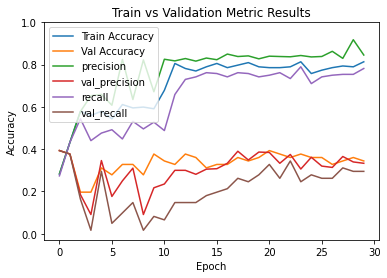

In [321]:
plt.plot(history8.history['accuracy'], label='Train Accuracy')
plt.plot(history8.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history8.history['precision'], label = 'precision')
plt.plot(history8.history['val_precision'], label = 'val_precision')
plt.plot(history8.history['recall'], label = 'recall')
plt.plot(history8.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Metric Results');

Model very overfit to training data. Validation accuracy, precision and recall scores have dropped aronnd 0.3. This might be from the pretrained neural network not being trained on images that are similiar to ear images.

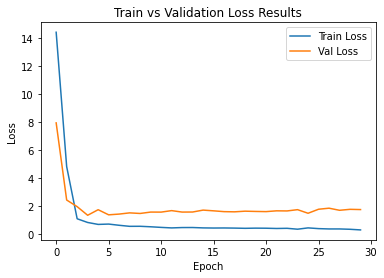

In [320]:
plt.plot(history8.history['loss'], label = 'Train Loss')
plt.plot(history8.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [160]:
test_preds = conv_base.predict(test_data_aug)

In [162]:
model8.evaluate(test_preds)

preds8 = model8.predict(test_preds) > 0.5

preds8 = preds8.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds8.argmax(axis=1))

5/5 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Results to DF

In [319]:
results_df['test_accuracy'].iloc[8] = 0

results_df['test_recall'].iloc[8] = 0

results_df['test_precision'].iloc[8] = 0

#### Confusion Matrix

In [163]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


          effusion  tube  normal
effusion        32    36       0
tube            27    33       0
normal          16    15       0


#### Classification Matrix 

In [164]:
print(classification_report(test_data_values, preds8.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.43      0.47      0.45        68
        tube       0.39      0.55      0.46        60
      normal       0.00      0.00      0.00        31

    accuracy                           0.41       159
   macro avg       0.27      0.34      0.30       159
weighted avg       0.33      0.41      0.36       159



/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 9: Adding Prebuilt Networks Xception

In [165]:
conv_base9 = Xception(include_top=False, input_shape = (150, 150, 3))

In [166]:
preds9 = conv_base9.predict(train_aug)

In [167]:
preds_val9 = conv_base9.predict(valid_aug)

In [168]:
model9 = Sequential()
model9.add(GlobalAveragePooling2D())
model9.add(Dense(100, activation = 'relu'))
model9.add(Dropout(0.1))
model9.add(Dense(50, activation = 'relu'))
model9.add(Dense(3, activation = 'softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [169]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [170]:
history9 = model9.fit(preds9, y_train_binarized, epochs = 30, validation_data = (preds_val9, y_valid_binarized),
    batch_size = 32)

Epoch 1/30
8/8 [==============================] - 1s 43ms/step - loss: 1.1091 - accuracy: 0.3690 - recall: 0.0357 - precision: 0.3000 - val_loss: 1.0852 - val_accuracy: 0.3934 - val_recall: 0.2295 - val_precision: 0.4667
Epoch 2/30
8/8 [==============================] - 0s 10ms/step - loss: 1.0395 - accuracy: 0.4524 - recall: 0.1587 - precision: 0.5263 - val_loss: 1.0551 - val_accuracy: 0.3934 - val_recall: 0.0656 - val_precision: 0.4444
Epoch 3/30
8/8 [==============================] - 0s 11ms/step - loss: 0.9536 - accuracy: 0.5437 - recall: 0.2381 - precision: 0.6977 - val_loss: 1.0576 - val_accuracy: 0.5082 - val_recall: 0.2295 - val_precision: 0.4667
Epoch 4/30
8/8 [==============================] - 0s 11ms/step - loss: 0.8925 - accuracy: 0.5913 - recall: 0.3929 - precision: 0.7279 - val_loss: 1.0746 - val_accuracy: 0.3934 - val_recall: 0.1639 - val_precision: 0.4000
Epoch 5/30
8/8 [==============================] - 0s 11ms/step - loss: 0.8257 - accuracy: 0.6627 - recall: 0.4325 - 

#### Adding Results to DF

In [323]:
results_df['train_accuracy'].iloc[9] = 0.9960 

results_df['train_recall'].iloc[9] =  0.9960

results_df['train_precision'].iloc[9] =  0.9960

results_df['val_accuracy'].iloc[9] = 0.3443

results_df['val_recall'].iloc[9] = 0.3279

results_df['val_precision'].iloc[9] = 0.3333  

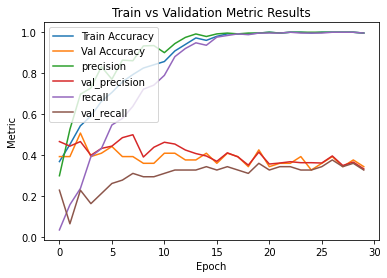

In [324]:
plt.plot(history9.history['accuracy'], label='Train Accuracy')
plt.plot(history9.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history9.history['precision'], label = 'precision')
plt.plot(history9.history['val_precision'], label = 'val_precision')
plt.plot(history9.history['recall'], label = 'recall')
plt.plot(history9.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model very overfit to training data. Validation accuracy, precision and recall scores have dropped aronnd 0.3. This might be from the pretrained neural network not being trained on images that are similiar to ear images.

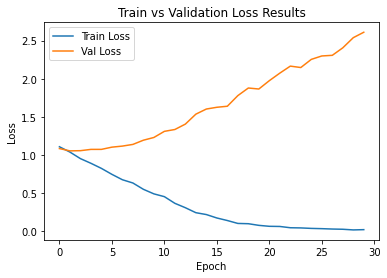

In [325]:
plt.plot(history9.history['loss'], label = 'Train Loss')
plt.plot(history9.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [173]:
preds9_test = conv_base9.predict(test_data_aug)
model9.evaluate(preds9_test)

preds9 = model9.predict(preds9_test) > 0.5

preds9 = preds9.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds9.argmax(axis=1))

5/5 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Results to DF

In [339]:

results_df['test_accuracy'].iloc[9] = 0

results_df['test_recall'].iloc[9] = 0

results_df['test_precision'].iloc[9] = 0


#### Confusion Matrix

In [145]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        34    31       3
tube            22    33       5
normal          10    19       2


#### Classification Report

In [174]:
print(classification_report(test_data_values, preds9.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.29      0.28      0.29        68
        tube       0.27      0.33      0.30        60
      normal       0.25      0.16      0.20        31

    accuracy                           0.28       159
   macro avg       0.27      0.26      0.26       159
weighted avg       0.28      0.28      0.27       159



## Model 10: Adding Prebuilt Networks VGG16

In [175]:
conv_base10 = VGG16(include_top=False, input_shape = (150, 150, 3))

In [176]:
preds10 = conv_base10.predict(train_aug)

In [177]:
preds_val10 = conv_base10.predict(valid_aug)

In [178]:
model10 = Sequential()
model10.add(GlobalAveragePooling2D())
model10.add(Dense(100, activation = 'relu'))
model10.add(Dropout(0.1))
model10.add(Dense(50, activation = 'relu'))
model10.add(Dense(3, activation = 'softmax'))

model10.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [179]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [180]:
history10 = model10.fit(preds10, y_train_binarized, epochs = 100, validation_data = (preds_val10, y_valid_binarized),
    batch_size = 30)

Epoch 1/100
9/9 [==============================] - 1s 43ms/step - loss: 1.0946 - accuracy: 0.3889 - recall: 0.0317 - precision: 0.3810 - val_loss: 1.0736 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0783 - accuracy: 0.3889 - recall: 0.0714 - precision: 0.3673 - val_loss: 1.0818 - val_accuracy: 0.3770 - val_recall: 0.0328 - val_precision: 0.6667
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 1.0537 - accuracy: 0.4524 - recall: 0.0278 - precision: 0.4667 - val_loss: 1.0760 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 1.0703 - accuracy: 0.4048 - recall: 0.1587 - precision: 0.4878 - val_loss: 1.0700 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0731 - accuracy: 0

#### Adding Results to DF

In [340]:
results_df['train_accuracy'].iloc[10] = 0.8095 

results_df['train_recall'].iloc[10] = 0.7619

results_df['train_precision'].iloc[10] = 0.8458

results_df['val_accuracy'].iloc[10] = 0.3770

results_df['val_recall'].iloc[10] = 0.2951

results_df['val_precision'].iloc[10] = 0.3529


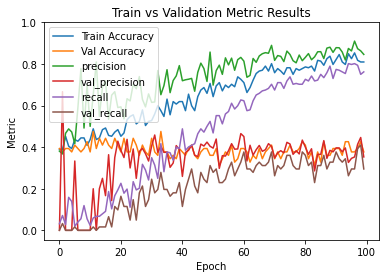

In [341]:
plt.plot(history10.history['accuracy'], label='Train Accuracy')
plt.plot(history10.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history10.history['precision'], label = 'precision')
plt.plot(history10.history['val_precision'], label = 'val_precision')
plt.plot(history10.history['recall'], label = 'recall')
plt.plot(history10.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model very overfit to training data. Validation accuracy, precision and recall scores have dropped aronnd 0.3. This might be from the pretrained neural network not being trained on images that are similiar to ear images.

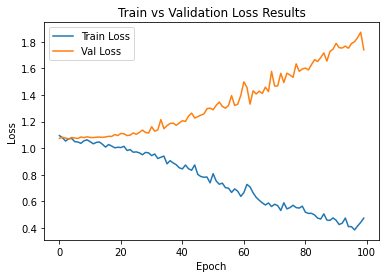

In [342]:
plt.plot(history10.history['loss'], label = 'Train Loss')
plt.plot(history10.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [184]:
preds10_test = conv_base10.predict(test_data_aug)

In [185]:
model10.evaluate(preds10_test)

preds10 = model10.predict(preds10_test) > 0.5

preds10 = preds10.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds10.argmax(axis=1))

5/5 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Result to DF

In [343]:
results_df['test_accuracy'].iloc[10] = 0 

results_df['test_recall'].iloc[10] = 0

results_df['test_precision'].iloc[10] = 0


#### Confusion Matrix 

In [186]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        41    21       6
tube            41    14       5
normal           6    21       4


#### Classification Report 

In [187]:
print(classification_report(test_data_values, preds10.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.47      0.60      0.53        68
        tube       0.25      0.23      0.24        60
      normal       0.27      0.13      0.17        31

    accuracy                           0.37       159
   macro avg       0.33      0.32      0.31       159
weighted avg       0.35      0.37      0.35       159



## Model 11: Adding Prebuilt Networks MobileNetV2

In [188]:
conv_base11 = MobileNetV2(include_top=False, input_shape = (150, 150, 3))

preds11 = conv_base11.predict(train_aug)

preds_val11 = conv_base11.predict(valid_aug)

model11 = Sequential()
model11.add(GlobalAveragePooling2D())
model11.add(Dense(100, activation = 'relu'))
model11.add(Dropout(0.1))
model11.add(Dense(50, activation = 'relu'))
model11.add(Dense(3, activation = 'softmax'))

model11.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

history11 = model11.fit(preds11, y_train_binarized, epochs = 100, validation_data = (preds_val11, y_valid_binarized),
    batch_size = 30)



Epoch 1/100
9/9 [==============================] - 1s 35ms/step - loss: 1.2035 - accuracy: 0.3770 - recall: 0.1548 - precision: 0.3305 - val_loss: 1.1009 - val_accuracy: 0.3279 - val_recall: 0.0656 - val_precision: 0.2500
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 1.0273 - accuracy: 0.4683 - recall: 0.2262 - precision: 0.4790 - val_loss: 1.0929 - val_accuracy: 0.3607 - val_recall: 0.0328 - val_precision: 0.5000
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.9663 - accuracy: 0.5040 - recall: 0.2143 - precision: 0.6353 - val_loss: 1.1217 - val_accuracy: 0.3770 - val_recall: 0.1148 - val_precision: 0.3043
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.9018 - accuracy: 0.5754 - recall: 0.3651 - precision: 0.6715 - val_loss: 1.1408 - val_accuracy: 0.4262 - val_recall: 0.2295 - val_precision: 0.4242
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.8201 - accuracy: 0.6270 - recall: 0.4563 -

#### Adding Results to DF

In [344]:
results_df['train_accuracy'].iloc[11] = 1

results_df['train_recall'].iloc[11] = 1

results_df['train_precision'].iloc[11] = 1

results_df['val_accuracy'].iloc[11] = 0.3115

results_df['val_recall'].iloc[11] = 0.3115

results_df['val_precision'].iloc[11] =  0.3220

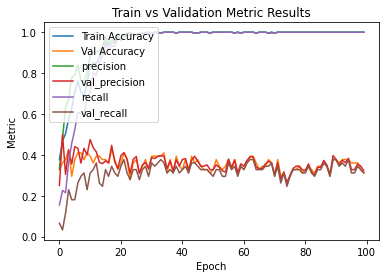

In [345]:
plt.plot(history11.history['accuracy'], label='Train Accuracy')
plt.plot(history11.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history11.history['precision'], label = 'precision')
plt.plot(history11.history['val_precision'], label = 'val_precision')
plt.plot(history11.history['recall'], label = 'recall')
plt.plot(history11.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model very overfit. Likley from pretrained network not being trained on ear images 

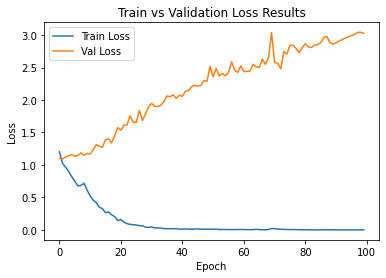

In [346]:
plt.plot(history11.history['loss'], label = 'Train Loss')
plt.plot(history11.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [191]:
preds11_test = conv_base11.predict(test_data_aug)

In [192]:
model11.evaluate(preds11_test)

preds11 = model11.predict(preds11_test) > 0.5

preds11 = preds11.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds11.argmax(axis=1))

5/5 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Result to DF

In [347]:
results_df['test_accuracy'].iloc[11] = 0

results_df['test_recall'].iloc[11] = 0

results_df['test_precision'].iloc[11] = 0

#### Confusion Matrix

In [193]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        36    24       8
tube            19    22      19
normal          20     4       7


#### Classification Report 

In [194]:
print(classification_report(test_data_values, preds11.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.48      0.53      0.50        68
        tube       0.44      0.37      0.40        60
      normal       0.21      0.23      0.22        31

    accuracy                           0.41       159
   macro avg       0.38      0.37      0.37       159
weighted avg       0.41      0.41      0.41       159



## Model 12: Experimenting with Convolutional Layers and Pooling (Adding Augmented Images)

In [195]:
model12 = Sequential()
model12.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model12.add(MaxPool2D((2, 2)))
model12.add(Flatten())
model12.add(Dense(100, activation = 'relu'))
model12.add(Dropout(0.1))
model12.add(Dense(3, activation = 'softmax'))

model12.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [196]:
history12 = model12.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 9s 1s/step - loss: 5.4775 - accuracy: 0.3373 - recall: 0.2817 - precision: 0.3302 - val_loss: 1.1714 - val_accuracy: 0.3770 - val_recall: 0.3279 - val_precision: 0.3571
Epoch 2/80
8/8 [==============================] - 7s 927ms/step - loss: 2.0144 - accuracy: 0.3849 - recall: 0.3492 - precision: 0.3877 - val_loss: 1.2772 - val_accuracy: 0.4754 - val_recall: 0.4426 - val_precision: 0.5510
Epoch 3/80
8/8 [==============================] - 7s 899ms/step - loss: 1.0969 - accuracy: 0.5198 - recall: 0.4246 - precision: 0.5661 - val_loss: 0.8089 - val_accuracy: 0.6557 - val_recall: 0.4590 - val_precision: 0.6512
Epoch 4/80
8/8 [==============================] - 7s 903ms/step - loss: 0.9340 - accuracy: 0.5952 - recall: 0.5238 - precision: 0.6256 - val_loss: 0.8198 - val_accuracy: 0.6393 - val_recall: 0.4754 - val_precision: 0.6170
Epoch 5/80
8/8 [==============================] - 7s 880ms/step - loss: 0.7842 - accuracy: 0.7460 - recall: 0.6190 

#### Adding Result to DF

In [348]:
results_df['train_accuracy'].iloc[12] = 0.9643

results_df['train_recall'].iloc[12] = 0.9603 

results_df['train_precision'].iloc[12] = 0.9758 

results_df['val_accuracy'].iloc[12] = 0.8197

results_df['val_recall'].iloc[12] = 0.8033

results_df['val_precision'].iloc[12] =  0.8448

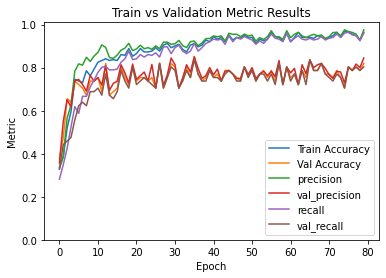

In [349]:
plt.plot(history12.history['accuracy'], label='Train Accuracy')
plt.plot(history12.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history12.history['precision'], label = 'precision')
plt.plot(history12.history['val_precision'], label = 'val_precision')
plt.plot(history12.history['recall'], label = 'recall')
plt.plot(history12.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


Model improving, slightly less overfit and validation recall, precision, and accuracy in 0.8s

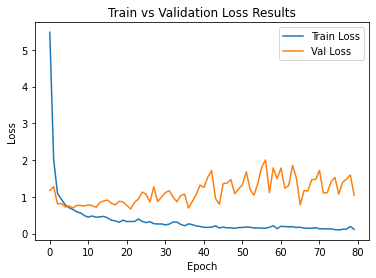

In [351]:
plt.plot(history12.history['loss'], label = 'Train Loss')
plt.plot(history12.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [381]:
model12.evaluate(test_data_aug)

preds12 = model12.predict(test_data_aug) > 0.5

preds12 = preds12.astype(int)

test_data_values = test_data.labels 


5/5 [==============================] - 3s 617ms/step - loss: 1.2518 - accuracy: 0.6541 - recall: 0.6352 - precision: 0.6733


#### Adding Results to DF

In [382]:
results_df['test_accuracy'].iloc[12] = 0.6541

results_df['test_recall'].iloc[12] = 0.6352

results_df['test_precision'].iloc[12] = 0.6733


#### Confusion Matrix

In [383]:
cm = confusion_matrix(test_data_values, preds12.argmax(axis=1))
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        42    20       6
tube            14    42       4
normal           5     6      20


#### Classification Report 

In [384]:
print(classification_report(test_data_values, preds12.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.69      0.62      0.65        68
        tube       0.62      0.70      0.66        60
      normal       0.67      0.65      0.66        31

    accuracy                           0.65       159
   macro avg       0.66      0.65      0.65       159
weighted avg       0.66      0.65      0.65       159



## Model 13: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Average Pool)

In [385]:
model13 = Sequential()
model13.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model13.add(AveragePooling2D((2, 2)))
model13.add(Flatten())
model13.add(Dense(100, activation = 'relu'))
model13.add(Dropout(0.1))
model13.add(Dense(3, activation = 'softmax'))

model13.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [386]:
history13 = model13.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 9s 1s/step - loss: 6.1651 - accuracy: 0.4167 - recall: 0.3770 - precision: 0.4338 - val_loss: 5.0642 - val_accuracy: 0.4098 - val_recall: 0.4098 - val_precision: 0.4098
Epoch 2/80
8/8 [==============================] - 8s 958ms/step - loss: 2.0725 - accuracy: 0.5238 - recall: 0.4921 - precision: 0.5299 - val_loss: 1.5971 - val_accuracy: 0.4098 - val_recall: 0.3607 - val_precision: 0.4314
Epoch 3/80
8/8 [==============================] - 7s 932ms/step - loss: 1.2381 - accuracy: 0.5119 - recall: 0.4206 - precision: 0.5492 - val_loss: 1.0622 - val_accuracy: 0.4262 - val_recall: 0.2131 - val_precision: 0.4815
Epoch 4/80
8/8 [==============================] - 7s 912ms/step - loss: 0.9608 - accuracy: 0.5437 - recall: 0.2341 - precision: 0.6556 - val_loss: 0.9491 - val_accuracy: 0.4754 - val_recall: 0.1967 - val_precision: 0.5217
Epoch 5/80
8/8 [==============================] - 7s 877ms/step - loss: 0.8763 - accuracy: 0.6270 - recall: 0.2460 

#### Adding Results to DF

In [388]:
results_df['train_accuracy'].iloc[13] =0.9524

results_df['train_recall'].iloc[13] = 0.9524 

results_df['train_precision'].iloc[13] = 0.9524 

results_df['val_accuracy'].iloc[13] = 0.7869

results_df['val_recall'].iloc[13] = 0.7869 

results_df['val_precision'].iloc[13] =  0.8136

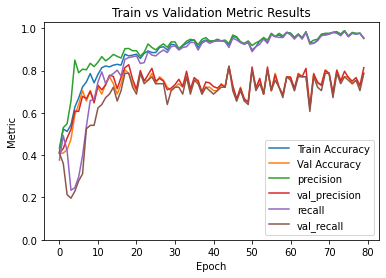

In [389]:
plt.plot(history13.history['accuracy'], label='Train Accuracy')
plt.plot(history13.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history13.history['precision'], label = 'precision')
plt.plot(history13.history['val_precision'], label = 'val_precision')
plt.plot(history13.history['recall'], label = 'recall')
plt.plot(history13.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


Model still showing that it is overfit. Validation accuracy, precision and recall in upper .7 and .8

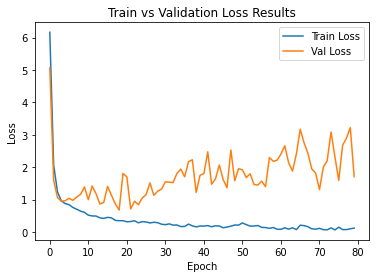

In [390]:
plt.plot(history13.history['loss'], label = 'Train Loss')
plt.plot(history13.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [392]:
model13.evaluate(test_data_aug)

preds13 = model13.predict(test_data_aug) > 0.5

preds13 = preds13.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds13.argmax(axis=1))

5/5 [==============================] - 4s 705ms/step - loss: 1.4025 - accuracy: 0.6855 - recall: 0.6730 - precision: 0.6859


#### Adding Results to DF

In [393]:
results_df['test_accuracy'].iloc[13] =0.6855

results_df['test_recall'].iloc[13] = 0.6730 

results_df['test_precision'].iloc[13] = 0.6859 


#### Confusion Matrix 

In [394]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        37    23       8
tube            12    44       4
normal           1     7      23


#### Classification Report 

In [395]:
print(classification_report(test_data_values, preds13.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.74      0.54      0.63        68
        tube       0.59      0.73      0.66        60
      normal       0.66      0.74      0.70        31

    accuracy                           0.65       159
   macro avg       0.66      0.67      0.66       159
weighted avg       0.67      0.65      0.65       159



## Model 14: Experimenting with Convolutional Layers, Augmented Images, and Pooling (Adding Global Average Pool)

In [396]:
model14 = Sequential()
model14.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model14.add(GlobalAveragePooling2D())
model14.add(Dense(100, activation = 'relu'))
model14.add(Dropout(0.1))
model14.add(Dense(3, activation = 'softmax'))

model14.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [404]:
history14 = model14.fit(train_aug, epochs = 100, validation_data = valid_aug,
    batch_size = 32)

Epoch 1/20
8/8 [==============================] - 7s 903ms/step - loss: 0.6830 - accuracy: 0.6984 - recall: 0.6389 - precision: 0.7667 - val_loss: 0.6052 - val_accuracy: 0.6721 - val_recall: 0.5574 - val_precision: 0.8293
Epoch 2/20
8/8 [==============================] - 7s 822ms/step - loss: 0.6438 - accuracy: 0.7103 - recall: 0.6190 - precision: 0.7610 - val_loss: 0.6012 - val_accuracy: 0.6230 - val_recall: 0.5410 - val_precision: 0.8684
Epoch 3/20
8/8 [==============================] - 7s 831ms/step - loss: 0.6455 - accuracy: 0.7183 - recall: 0.6548 - precision: 0.7674 - val_loss: 0.5984 - val_accuracy: 0.6721 - val_recall: 0.5574 - val_precision: 0.8500
Epoch 4/20
8/8 [==============================] - 7s 831ms/step - loss: 0.6334 - accuracy: 0.7262 - recall: 0.6349 - precision: 0.7805 - val_loss: 0.5863 - val_accuracy: 0.6557 - val_recall: 0.5902 - val_precision: 0.8571
Epoch 5/20
8/8 [==============================] - 7s 896ms/step - loss: 0.6325 - accuracy: 0.7302 - recall: 0.65

#### Adding Results to DF

In [408]:
results_df['train_accuracy'].iloc[14] =  0.7460

results_df['train_recall'].iloc[14] = 0.6786

results_df['train_precision'].iloc[14] = 0.7880

results_df['val_accuracy'].iloc[14] = 0.6557

results_df['val_recall'].iloc[14] = 0.5738

results_df['val_precision'].iloc[14] =  0.7292


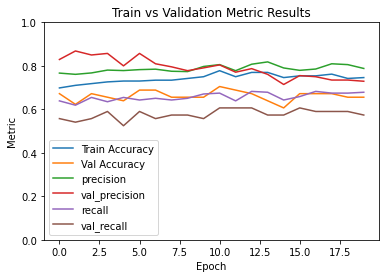

In [405]:
plt.plot(history14.history['accuracy'], label='Train Accuracy')
plt.plot(history14.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history14.history['precision'], label = 'precision')
plt.plot(history14.history['val_precision'], label = 'val_precision')
plt.plot(history14.history['recall'], label = 'recall')
plt.plot(history14.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

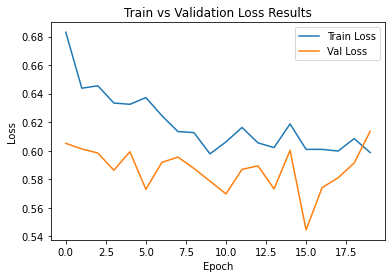

In [406]:
plt.plot(history14.history['loss'], label = 'Train Loss')
plt.plot(history14.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [407]:
model14.evaluate(test_data_aug)

preds14 = model14.predict(test_data_aug) > 0.5

preds14 = preds14.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds14.argmax(axis=1))

5/5 [==============================] - 3s 648ms/step - loss: 0.9381 - accuracy: 0.5597 - recall: 0.4780 - precision: 0.6609


#### Adding Results to DF

In [409]:
results_df['test_accuracy'].iloc[14] = 0.5597

results_df['test_recall'].iloc[14] = 0.4780 

results_df['test_precision'].iloc[14] = 0.6609


#### Confusion Matrix

In [410]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


          effusion  tube  normal
effusion        47    16       5
tube            12    46       2
normal          19    10       2


#### Classification Report 

In [411]:
print(classification_report(test_data_values, preds14.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.60      0.69      0.64        68
        tube       0.64      0.77      0.70        60
      normal       0.22      0.06      0.10        31

    accuracy                           0.60       159
   macro avg       0.49      0.51      0.48       159
weighted avg       0.54      0.60      0.56       159



## Model 15: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Global Max Pool)

In [412]:
model15 = Sequential()
model15.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model15.add(GlobalMaxPooling2D())
model15.add(Dense(100, activation = 'relu'))
model15.add(Dropout(0.1))
model15.add(Dense(3, activation = 'softmax'))

model15.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [413]:
history15 = model15.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 9s 1s/step - loss: 1.1170 - accuracy: 0.3452 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0850 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/80
8/8 [==============================] - 8s 956ms/step - loss: 1.0732 - accuracy: 0.4484 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0604 - val_accuracy: 0.4426 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/80
8/8 [==============================] - 7s 947ms/step - loss: 1.0574 - accuracy: 0.4325 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0541 - val_accuracy: 0.4918 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/80
8/8 [==============================] - 8s 944ms/step - loss: 1.0472 - accuracy: 0.4921 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0499 - val_accuracy: 0.4590 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/80
8/8 [==============================] - 8

#### Adding Result to DF

In [414]:
results_df['train_accuracy'].iloc[15] = 0.7500

results_df['train_recall'].iloc[15] = 0.6746 

results_df['train_precision'].iloc[15] =0.7870

results_df['val_accuracy'].iloc[15] =  0.6885

results_df['val_recall'].iloc[15] = 0.6066

results_df['val_precision'].iloc[15] =  0.7400

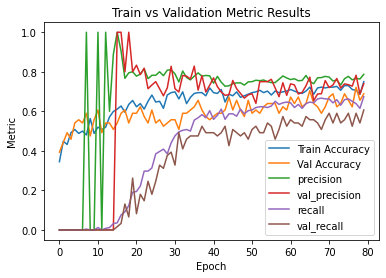

In [415]:
plt.plot(history15.history['accuracy'], label='Train Accuracy')
plt.plot(history15.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history15.history['precision'], label = 'precision')
plt.plot(history15.history['val_precision'], label = 'val_precision')
plt.plot(history15.history['recall'], label = 'recall')
plt.plot(history15.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

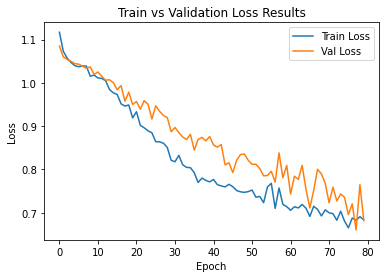

In [416]:
plt.plot(history15.history['loss'], label = 'Train Loss')
plt.plot(history15.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [ ]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [418]:
model15.evaluate(test_data_aug)

preds15 = model15.predict(test_data_aug) > 0.5

preds15 = preds15.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds15.argmax(axis=1))

5/5 [==============================] - 4s 768ms/step - loss: 0.9572 - accuracy: 0.6352 - recall: 0.5723 - precision: 0.6741


#### Adding Results to DF

In [419]:
results_df['test_accuracy'].iloc[15] = 0.6352

results_df['test_recall'].iloc[15] = 0.5723

results_df['test_precision'].iloc[15] = 0.6741


#### Confusion Matrix

In [420]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        44    11      13
tube             6    44      10
normal           8    10      13


#### Classification Report 

In [421]:
print(classification_report(test_data_values, preds15.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.76      0.65      0.70        68
        tube       0.68      0.73      0.70        60
      normal       0.36      0.42      0.39        31

    accuracy                           0.64       159
   macro avg       0.60      0.60      0.60       159
weighted avg       0.65      0.64      0.64       159



## Model 16: Freezing Inception-ResNetV2

In [7]:
train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training')

valid_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'validation' )

Found 252 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


In [141]:
#reference https://www.youtube.com/watch?v=3ou0KYtDlOI

In [8]:
conv_base18 = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor = Input(shape=(299,299,3)), input_shape = (299, 299, 3))



In [9]:
type(conv_base18)

tensorflow.python.keras.engine.functional.Functional

In [8]:
conv_base18.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [10]:
model18 = Sequential()
for layer in conv_base18.layers[0]:
    #model18.add(Flatten())
    model18.add(layer)

for layers in model18.layers:
    layer.trainable = False 

TypeError: 'InputLayer' object is not iterable

In [ ]:
model18.add(GlobalAveragePooling2D(input_shape = 150, 150, 3 =))

model18.add(Dense(50, activation = 'relu'))

model18.add(Dense(units = 3, activation = 'softmax'))

model18.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


history = model18.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32, callbacks=[early_stop])

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

### Export Model Summary DF

In [ ]:
results_df.info()

results_df = results_df.apply(pd.to_numeric)


In [422]:
results_df.describe()

,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.915913,0.644469,0.398181,0.926894,0.656500,0.410119,0.901531,0.621938,0.385613
std,0.102404,0.185441,0.249953,0.089425,0.195599,0.259745,0.124459,0.199111,0.240683
min,0.746000,0.311500,0.000000,0.787000,0.322000,0.000000,0.674600,0.295100,0.000000
25%,0.812500,0.586025,0.311325,0.845725,0.616900,0.317325,0.793625,0.512325,0.311325
50%,0.980150,0.713100,0.455950,0.985900,0.736650,0.465500,0.978150,0.713100,0.455950
75%,1.000000,0.762300,0.561275,1.000000,0.772850,0.587700,1.000000,0.762300,0.545600
max,1.000000,0.819700,0.685500,1.000000,0.844800,0.685900,1.000000,0.819700,0.673000


In [426]:
results_df

,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
baseline,1.0000,0.7541,0.4528,1.0000,0.7627,0.4528,1.0000,0.7377,0.4528
model_1,1.0000,0.7541,0.4403,1.0000,0.7541,0.4403,1.0000,0.7541,0.4403
model_2,1.0000,0.7049,0.4591,1.0000,0.7049,0.4679,1.0000,0.7049,0.4591
model_3,0.7976,0.7213,0.4151,0.7976,0.7333,0.4231,0.7976,0.7213,0.4151
model_4,0.9960,0.7377,0.5094,1.0000,0.7500,0.5094,0.9960,0.7377,0.5094
model_5,0.8333,0.6885,0.4528,0.8462,0.7069,0.4631,0.8294,0.6721,0.4340
model_6,0.9960,0.8033,0.5409,0.9960,0.8033,0.5478,0.9960,0.8033,0.5409
model_7,1.0000,0.8197,0.5660,1.0000,0.8197,0.5633,1.0000,0.8197,0.5597
model_8,0.8135,0.3443,0.0000,0.8455,0.3333,0.0000,0.7817,0.2951,0.0000
model_9,0.9960,0.3443,0.0000,0.9960,0.3333,0.0000,0.9960,0.3279,0.0000


In [425]:
results_df.to_csv('../data/results_df.csv')

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

test_gen = ImageDataGenerator(rescale = 1/255.)

test_data = test_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/')

preds = model7.predict(test_data) >.5

np.argmax(preds.astype(int), axis = 0)

test_data_values = test_data.labels 

test_data_values

x_test_binarized = to_categorical(test_data_values)

model7.evaluate()

path = "/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/tube_test/AM85R.jpg"

test = image.load_img(path, target_size=(256, 256))
test

model7.predict(np.asarray(test).reshape(1, 256, 256, 3))